In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

In [257]:
df_user_interactions = pd.read_csv('user_item_interactions.csv')
df_live_item_data = pd.read_csv('live_item_data.csv')
df_user_features = pd.read_csv('user_features.csv')
df_item_interactions = pd.read_csv('item_data_for_interactions.csv')

<h1>Part 1</h1>
<h3>Question 1</h3>

In [258]:
df_user_interactions.head()

,user_objectid,item_objectid,interaction_type,createdat
0,01d8CuzSnr,SPGdb5DcAF,wishlist,2022-02-26T23:43:16.037Z
1,02AkaUhITO,r0p6IGXjgt,order,2022-04-28T23:27:37.158Z
2,02dSnWTUGU,xRhYBpDNqM,wishlist,2022-08-17T00:36:07.107Z
3,01Oceyt3ZP,PyjChJEkBw,order,2022-09-05T19:34:19.553Z
4,00wGE6lNGR,DN4SacCG98,order,2022-09-27T19:29:47.646Z


In [259]:
df_user_interactions.shape

(28219, 4)

In [260]:
df_user_interactions.describe()

,user_objectid,item_objectid,interaction_type,createdat
count,28219,28219,28219,28219
unique,100,26443,2,25627
top,01d8CuzSnr,RAg7fC8Pg7,wishlist,2022-10-19T19:37:04.734Z
freq,3250,4,25045,46


In [261]:
df_user_interactions['user_objectid'].nunique()

100

In [262]:
wishlist_data = df_user_interactions[df_user_interactions['interaction_type'] == 'wishlist']
wishlist_counts = wishlist_data.groupby('user_objectid').size()

In [263]:
print("Users with most wishlist interactions:", wishlist_counts.nlargest(5))
print("\nUsers with least wishlist interactions:",wishlist_counts.nsmallest(5))

Users with most wishlist interactions: user_objectid
01d8CuzSnr    3225
00EblWiOYS    2257
00pzdpRTGa    1421
01yzaGijlt    1207
027icITZkB    1121
dtype: int64

Users with least wishlist interactions: user_objectid
01FHkTzL5a    1
007kRtmfYb    2
01YK6HjAqV    2
01h2wj7Mh0    2
00FdTl6dbN    3
dtype: int64


In [264]:
print("\nAverage number of wishlisted items:", wishlist_counts.mean())
print("\nMedian number of wishlisted items:", wishlist_counts.median())


Average number of wishlisted items: 284.60227272727275

Median number of wishlisted items: 105.0


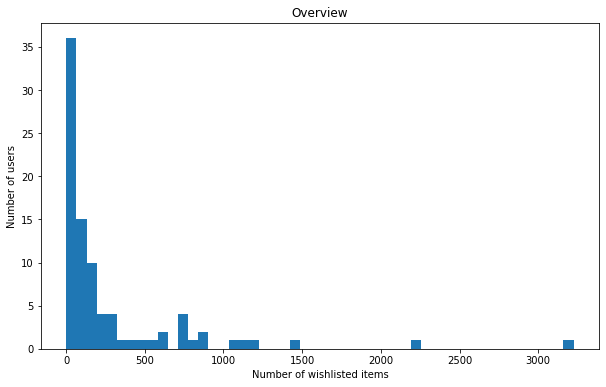

In [265]:
plt.figure(figsize=(10, 6))
plt.hist(wishlist_counts,bins=50)
plt.title('Overview')
plt.xlabel('Number of wishlisted items')
plt.ylabel('Number of users');

<h3>Question 2</h3>

In [266]:
df_item_interactions.head()

,item_objectid,metadata,category,image
0,009P4Tknu1,"{'size': 'SHOES-EU-39', 'type': 'Ankle boots', 'brand': 'Acne', 'color': ['Black'], 'defects': [...",Shoes > Boots,https://prod.files.sellpy.net/photoRobot-case-maupin/ha4Ta0gvFA-167d-0.jpg
1,00ameztXgE,"{'size': 'WMN-INT-S', 'type': 'Undershirt', 'brand': 'Intimissimi', 'color': ['White'], 'defects...",Clothing > Underwear > Functional underwear,https://prod.files.sellpy.net/photoRobot-standard-ranby-g-2/00ameztXgE-6f01-0.jpg
2,00CK34S7lV,"{'size': 'WMN-INT-M', 'type': 'Coat', 'brand': 'Zara Woman', 'color': ['Blue'], 'pattern': 'Mono...",Clothing > Jackets & Outerwear > Coats,https://prod.files.sellpy.net/photoRobot-standard-boone/zgGyXX8hEX-cdc5-0.jpg
3,00dyLCIfHZ,"{'type': 'Tablet', 'brand': 'Apple', 'color': ['Silver'], 'defects': [{'id': '3938618483', 'type...",Consumer Electronics > Tablets > Tablets,https://prod.files.sellpy.net/photoRobot-manual-sels-g-1/00dyLCIfHZ-3310-single.jpg
4,00FIeAdWJw,"{'size': 'WMN-INT-XL', 'type': 'Parka', 'brand': 'Wellensteyn', 'color': ['Black'], 'pattern': '...",Clothing > Jackets & Outerwear > Coats,https://prod.files.sellpy.net/photoRobot-standard-owens-g-5/00FIeAdWJw-034b-0.jpg


In [267]:
df_interactions=df_user_interactions.merge(df_item_interactions, on='item_objectid', how='left')

In [268]:
df_interactions.head()

,user_objectid,item_objectid,interaction_type,createdat,metadata,category,image
0,01d8CuzSnr,SPGdb5DcAF,wishlist,2022-02-26T23:43:16.037Z,"{'type': 'Notepad', 'brand': 'FSC', 'condition': 'New', 'measurement': {'widthInCm': 21, 'length...",Home > Office > Other,https://prod.files.sellpy.net/photoRobot-fixed-morat-g-3/SPGdb5DcAF-4a96-0-timed-sequence.jpg
1,02AkaUhITO,r0p6IGXjgt,order,2022-04-28T23:27:37.158Z,"{'size': 'PANTS-INCH-27', 'type': 'Jeans', 'brand': 'Lee', 'color': ['Black'], 'pattern': 'Monoc...",Clothing > Pants & Jeans > Jeans,https://prod.files.sellpy.net/photoRobot-hanging-wise-g-2/r0p6IGXjgt-2d14-0.jpg
2,02dSnWTUGU,xRhYBpDNqM,wishlist,2022-08-17T00:36:07.107Z,"{'type': 'Shoulder-bag', 'color': ['Brown', 'Multicolored'], 'material': ['Cotton'], 'condition'...",Accessories > Bags,https://prod.files.sellpy.net/photoRobot-fixed-hamm-g-4/xRhYBpDNqM-e7a6-0-timed-sequence.jpg
3,01Oceyt3ZP,PyjChJEkBw,order,2022-09-05T19:34:19.553Z,"{'size': 'WMN-INT-S/M', 'type': 'Top', 'brand': 'Carin Wester', 'color': ['Black'], 'pattern': '...",Clothing > Tops,https://prod.files.sellpy.net/photoRobot-standard-fait-g-1/Bf02ZnUtig-8799-0.jpg
4,00wGE6lNGR,DN4SacCG98,order,2022-09-27T19:29:47.646Z,"{'size': 'WMN-INT-XS', 'type': 'Bolero', 'brand': 'VILA Clothes', 'color': ['Gray'], 'material':...",Clothing > Sweaters & Cardigans > Cardigans,https://prod.files.sellpy.net/photoRobot-standard-fraenkel-g-3/DN4SacCG98-84ce-0.jpg


In [269]:
df_interactions['main_category'] = df_interactions['category'].str.split(' > ').str[0]

In [270]:
df_interactions['main_category'].unique()

array(['Home', 'Clothing', 'Accessories', 'Shoes',
       "Children's articles & Toys", 'Leisure', 'Furniture & Decor',
       'Consumer Electronics', 'Media & Gaming', 'Beauty'], dtype=object)

In [271]:
df_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28219 entries, 0 to 28218
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_objectid     28219 non-null  object
 1   item_objectid     28219 non-null  object
 2   interaction_type  28219 non-null  object
 3   createdat         28219 non-null  object
 4   metadata          28218 non-null  object
 5   category          28219 non-null  object
 6   image             28219 non-null  object
 7   main_category     28219 non-null  object
dtypes: object(8)
memory usage: 1.7+ MB


In [272]:
#Main categories

order_main_category_counts = df_interactions[df_interactions['interaction_type'] == 'order']['main_category'].value_counts()
wishlist_main_category_counts = df_interactions[df_interactions['interaction_type'] == 'wishlist']['main_category'].value_counts()

print("Most popular main categories to order: ", order_main_category_counts.head(3))
print("\nLeast popular main categories to order: ", order_main_category_counts.tail(3))
print("\nMost popular main categories to wishlist: ", wishlist_main_category_counts.head(3))
print("\nLeast popular main categories to wishlist: ", wishlist_main_category_counts.tail(3))

Most popular main categories to order:  main_category
Clothing       2565
Accessories     257
Shoes           224
Name: count, dtype: int64

Least popular main categories to order:  main_category
Furniture & Decor    20
Media & Gaming       11
Beauty                6
Name: count, dtype: int64

Most popular main categories to wishlist:  main_category
Clothing       16915
Accessories     2493
Shoes           1822
Name: count, dtype: int64

Least popular main categories to wishlist:  main_category
Media & Gaming                239
Children's articles & Toys    174
Beauty                         56
Name: count, dtype: int64


In [273]:
#Detailed categories

order_category_counts = df_interactions[df_interactions['interaction_type'] == 'order']['category'].value_counts()
wishlist_category_counts = df_interactions[df_interactions['interaction_type'] == 'wishlist']['category'].value_counts()

print("Most popular categories to order: ", order_category_counts.head(3))
print("\nLeast popular categories to order: ", order_category_counts.tail(3))
print("\nMost popular categories to wishlist: ", wishlist_category_counts.head(3))
print("\nLeast popular categories to wishlist: ", wishlist_category_counts.tail(3))

Most popular categories to order:  category
Clothing > Dresses > Dresses                       353
Clothing > Pants & Jeans > Pants                   212
Clothing > T-shirts & Tank tops > Short-sleeved    187
Name: count, dtype: int64

Least popular categories to order:  category
Home > Glasses & Cups > Cups & Mugs    1
Beauty > Makeup > Eyes                 1
Home > Kitchen > Kitchen textiles      1
Name: count, dtype: int64

Most popular categories to wishlist:  category
Clothing > Dresses > Dresses                  2194
Clothing > Sweaters & Cardigans > Sweaters    1566
Clothing > Tops                               1456
Name: count, dtype: int64

Least popular categories to wishlist:  category
Media & Gaming > Games > Game accessories        1
Consumer Electronics > Networking > Modems       1
Children's articles & Toys > Food accessories    1
Name: count, dtype: int64


<h3>Question 3</h3>

In [274]:
df_user_features.head()

,user_objectid,country,demography_array,score_array_demography,brand_array,score_array_brand
0,0013MOFg0A,SE,"['Women', 'No demography', 'Unisex (Adults)']","[0.95, 0.03, 0.02]","['No Brand', 'EDC by ESPRIT', 'Zara', 'NA-KD', 'Acne Studios', 'Divided by H&M', 'ESPRIT', 'Tige...","[0.09, 0.04, 0.04, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01,..."
1,002j8z9gFN,SE,['Women'],[1.0],"['Please', 'Boomerang', 'Stenströms']","[0.8, 0.1, 0.1]"
2,003shjZWGk,DE,['Women'],[1.0],"['H&M', 'Divided by H&M', 'Vero Moda', 'No Brand', 'NLY Trend', 'Shein', 'Melville', 'VILA Cloth...","[0.1, 0.09, 0.05, 0.05, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, ..."
3,004GS5uR2D,DE,['Kids'],[1.0],"['H&M', 'Alvi', 'Villervalla', 'No Brand', 'Jako.O', 'Baby Skill']","[0.31, 0.31, 0.15, 0.08, 0.08, 0.08]"
4,007kRtmfYb,SE,"['Kids', 'Women', 'Men']","[0.71, 0.27, 0.02]","['No Brand', 'H&M', 'Wall Ride', 'Design by KappAhl ', 'Adidas', 'H&M Basic', 'Hummel', 'Brugi'...","[0.25, 0.17, 0.13, 0.13, 0.13, 0.13, 0.02, 0.02, 0.02, 0.02]"


In [275]:
df_user_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_objectid           100 non-null    object
 1   country                 99 non-null     object
 2   demography_array        100 non-null    object
 3   score_array_demography  100 non-null    object
 4   brand_array             100 non-null    object
 5   score_array_brand       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [276]:
df_user_features = df_user_features.dropna()

In [277]:
df_user_features.groupby('country').count()

,user_objectid,demography_array,score_array_demography,brand_array,score_array_brand
country,,,,,
DE,19,19,19,19,19
FI,1,1,1,1,1
NL,2,2,2,2,2
SE,77,77,77,77,77


In [278]:
df_user_order_data=df_interactions.merge(df_user_features, on='user_objectid', how='left')

In [279]:
df_user_order_data.head()

,user_objectid,item_objectid,interaction_type,createdat,metadata,category,image,main_category,country,demography_array,score_array_demography,brand_array,score_array_brand
0,01d8CuzSnr,SPGdb5DcAF,wishlist,2022-02-26T23:43:16.037Z,"{'type': 'Notepad', 'brand': 'FSC', 'condition': 'New', 'measurement': {'widthInCm': 21, 'length...",Home > Office > Other,https://prod.files.sellpy.net/photoRobot-fixed-morat-g-3/SPGdb5DcAF-4a96-0-timed-sequence.jpg,Home,SE,"['No demography', 'Women', 'Men', 'Unisex (Adults)', 'Kids']","[0.66, 0.29, 0.02, 0.02, 0.01]","['No Brand', 'H&M', 'Indiska', 'IKEA', 'Ravensburger', 'Ellos', 'Nedis', 'Peak Performance', 'Fa...","[0.33, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,..."
1,02AkaUhITO,r0p6IGXjgt,order,2022-04-28T23:27:37.158Z,"{'size': 'PANTS-INCH-27', 'type': 'Jeans', 'brand': 'Lee', 'color': ['Black'], 'pattern': 'Monoc...",Clothing > Pants & Jeans > Jeans,https://prod.files.sellpy.net/photoRobot-hanging-wise-g-2/r0p6IGXjgt-2d14-0.jpg,Clothing,SE,['Men'],[1.0],['Sail Racing'],[1.0]
2,02dSnWTUGU,xRhYBpDNqM,wishlist,2022-08-17T00:36:07.107Z,"{'type': 'Shoulder-bag', 'color': ['Brown', 'Multicolored'], 'material': ['Cotton'], 'condition'...",Accessories > Bags,https://prod.files.sellpy.net/photoRobot-fixed-hamm-g-4/xRhYBpDNqM-e7a6-0-timed-sequence.jpg,Accessories,SE,"['Women', 'No demography', 'Unisex (Adults)', 'Men', 'Kids']","[0.7, 0.16, 0.13, 0.01, 0.01]","['No Brand', 'Marimekko', 'Pashmina', 'H&M', 'Odd Molly', 'Vinga', 'Desigual', 'Passigatti', 'In...","[0.26, 0.06, 0.05, 0.04, 0.04, 0.04, 0.04, 0.03, 0.03, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,..."
3,01Oceyt3ZP,PyjChJEkBw,order,2022-09-05T19:34:19.553Z,"{'size': 'WMN-INT-S/M', 'type': 'Top', 'brand': 'Carin Wester', 'color': ['Black'], 'pattern': '...",Clothing > Tops,https://prod.files.sellpy.net/photoRobot-standard-fait-g-1/Bf02ZnUtig-8799-0.jpg,Clothing,SE,"['Women', 'Kids', 'Men']","[0.85, 0.14, 0.0]","['Pieces', 'H&M', 'Carin Wester', 'Girl In Mind', 'Starlet', 'New Look', '2-biz', 'J.Lindeberg',...","[0.18, 0.13, 0.07, 0.07, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,..."
4,00wGE6lNGR,DN4SacCG98,order,2022-09-27T19:29:47.646Z,"{'size': 'WMN-INT-XS', 'type': 'Bolero', 'brand': 'VILA Clothes', 'color': ['Gray'], 'material':...",Clothing > Sweaters & Cardigans > Cardigans,https://prod.files.sellpy.net/photoRobot-standard-fraenkel-g-3/DN4SacCG98-84ce-0.jpg,Clothing,SE,"['Women', 'Unisex (Adults)', 'No demography', 'Men']","[0.87, 0.09, 0.03, 0.0]","['Zara', 'Gina Tricot', 'No Brand', 'Nike', 'Michael Kors', 'Mango', 'H&M', 'Urban Outfitters', ...","[0.1, 0.09, 0.07, 0.04, 0.04, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.01, 0.01, ..."


In [280]:
df_user_order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28219 entries, 0 to 28218
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_objectid           28219 non-null  object
 1   item_objectid           28219 non-null  object
 2   interaction_type        28219 non-null  object
 3   createdat               28219 non-null  object
 4   metadata                28218 non-null  object
 5   category                28219 non-null  object
 6   image                   28219 non-null  object
 7   main_category           28219 non-null  object
 8   country                 28157 non-null  object
 9   demography_array        28157 non-null  object
 10  score_array_demography  28157 non-null  object
 11  brand_array             28157 non-null  object
 12  score_array_brand       28157 non-null  object
dtypes: object(13)
memory usage: 2.8+ MB


In [281]:
counts = df_user_order_data.groupby(['country','interaction_type'])['user_objectid'].count()
print(counts)

country  interaction_type
DE       order                 406
         wishlist              983
FI       order                  11
         wishlist              291
NL       order                  66
         wishlist              427
SE       order                2678
         wishlist            23295
Name: user_objectid, dtype: int64


In [282]:
#Share of interactions separately
((counts / counts.sum()) * 100).round(2)

country  interaction_type
DE       order                1.44
         wishlist             3.49
FI       order                0.04
         wishlist             1.03
NL       order                0.23
         wishlist             1.52
SE       order                9.51
         wishlist            82.73
Name: user_objectid, dtype: float64

In [283]:
total_counts = counts.groupby(level=0).sum()

In [284]:
#Share of interactions in total
((total_counts / total_counts.sum()) * 100).round(2)

country
DE     4.93
FI     1.07
NL     1.75
SE    92.24
Name: user_objectid, dtype: float64

In [285]:
#Share of interactions in total
share = ((total_counts / total_counts.sum()) * 100).round(2)

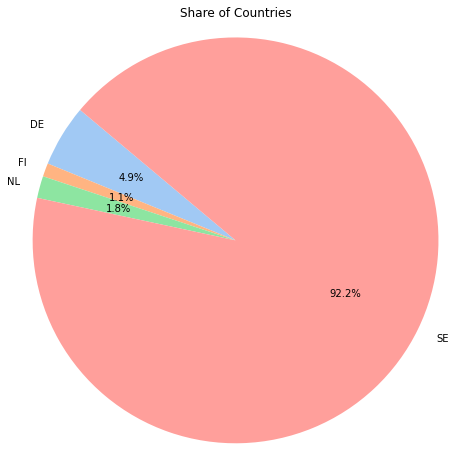

In [286]:
palette = sns.color_palette("pastel")

plt.figure(figsize=(8, 8))
plt.pie(share, labels=share.index, autopct='%1.1f%%', startangle=140, colors=palette)
plt.title('Share of Countries')
plt.axis('equal')
plt.show()

<h3>Question 4</h3>

In [287]:
df_user_features = pd.read_csv('user_features.csv')

In [288]:
df_user_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_objectid           100 non-null    object
 1   country                 99 non-null     object
 2   demography_array        100 non-null    object
 3   score_array_demography  100 non-null    object
 4   brand_array             100 non-null    object
 5   score_array_brand       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [289]:
df_user_features.head()

,user_objectid,country,demography_array,score_array_demography,brand_array,score_array_brand
0,0013MOFg0A,SE,"['Women', 'No demography', 'Unisex (Adults)']","[0.95, 0.03, 0.02]","['No Brand', 'EDC by ESPRIT', 'Zara', 'NA-KD', 'Acne Studios', 'Divided by H&M', 'ESPRIT', 'Tige...","[0.09, 0.04, 0.04, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01,..."
1,002j8z9gFN,SE,['Women'],[1.0],"['Please', 'Boomerang', 'Stenströms']","[0.8, 0.1, 0.1]"
2,003shjZWGk,DE,['Women'],[1.0],"['H&M', 'Divided by H&M', 'Vero Moda', 'No Brand', 'NLY Trend', 'Shein', 'Melville', 'VILA Cloth...","[0.1, 0.09, 0.05, 0.05, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, ..."
3,004GS5uR2D,DE,['Kids'],[1.0],"['H&M', 'Alvi', 'Villervalla', 'No Brand', 'Jako.O', 'Baby Skill']","[0.31, 0.31, 0.15, 0.08, 0.08, 0.08]"
4,007kRtmfYb,SE,"['Kids', 'Women', 'Men']","[0.71, 0.27, 0.02]","['No Brand', 'H&M', 'Wall Ride', 'Design by KappAhl ', 'Adidas', 'H&M Basic', 'Hummel', 'Brugi'...","[0.25, 0.17, 0.13, 0.13, 0.13, 0.13, 0.02, 0.02, 0.02, 0.02]"


In [290]:
df_user_features.dtypes

user_objectid             object
country                   object
demography_array          object
score_array_demography    object
brand_array               object
score_array_brand         object
dtype: object

In [291]:
all_users = print(len(df_user_features))

100


In [292]:
kids_interested_users = df_user_features[df_user_features['demography_array'].apply(lambda x: 'Kids' in x)]

In [293]:
print(len(kids_interested_users))

51


In [294]:
print(round(len(kids_interested_users)/len(df_user_features)*100,2), "% of users are interested in kids items")

51.0 % of users are interested in kids items


In [295]:
kids_interested_users.head()

,user_objectid,country,demography_array,score_array_demography,brand_array,score_array_brand
3,004GS5uR2D,DE,['Kids'],[1.0],"['H&M', 'Alvi', 'Villervalla', 'No Brand', 'Jako.O', 'Baby Skill']","[0.31, 0.31, 0.15, 0.08, 0.08, 0.08]"
4,007kRtmfYb,SE,"['Kids', 'Women', 'Men']","[0.71, 0.27, 0.02]","['No Brand', 'H&M', 'Wall Ride', 'Design by KappAhl ', 'Adidas', 'H&M Basic', 'Hummel', 'Brugi'...","[0.25, 0.17, 0.13, 0.13, 0.13, 0.13, 0.02, 0.02, 0.02, 0.02]"
5,00A1P3WzSF,FI,"['Women', 'Kids', 'Unisex (Adults)', 'No demography']","[0.86, 0.11, 0.02, 0.01]","['Shein', 'H&M', 'Shein Curve', 'Gina Tricot', 'Zara', 'Divided by H&M', 'Mini Rodini', 'No Bran...","[0.23, 0.13, 0.1, 0.07, 0.06, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.01, 0.01, ..."
11,00EblWiOYS,SE,"['Women', 'Men', 'Unisex (Adults)', 'No demography', 'Kids']","[0.83, 0.13, 0.02, 0.01, 0.01]","['Acne', 'Mulberry', 'H&M', 'Cacharel', 'Acne Studios', 'No Brand', 'Sisley', 'Filippa K', 'Ralp...","[0.07, 0.06, 0.04, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01,..."
16,00GxTJDPQ9,SE,"['Kids', 'Women', 'Men']","[0.48, 0.48, 0.04]","['Zara Kids', 'Arket', 'Lindex', 'Acne Studios Blå Konst', 'Shein', 'Juicy Couture', 'Zara', 'Cl...","[0.08, 0.08, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,..."


In [296]:
kids_interested_users['demography_array'] = kids_interested_users['demography_array'].apply(ast.literal_eval)
kids_interested_users['score_array_demography'] = kids_interested_users['score_array_demography'].apply(ast.literal_eval)

<ipython-input-296-0e725aa89f57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kids_interested_users['demography_array'] = kids_interested_users['demography_array'].apply(ast.literal_eval)
<ipython-input-296-0e725aa89f57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kids_interested_users['score_array_demography'] = kids_interested_users['score_array_demography'].apply(ast.literal_eval)


In [297]:
def kids_score_over_50(demography, scores):
    for i, category in enumerate(demography):
        if category == 'Kids' and scores[i] > 0.5:
            return True
    return False

In [298]:
df_over_50_kids_score = kids_interested_users[kids_interested_users.apply(lambda x: kids_score_over_50(x['demography_array'], x['score_array_demography']), axis=1)]

In [299]:
df_over_50_kids_score.head(10)

,user_objectid,country,demography_array,score_array_demography,brand_array,score_array_brand
3,004GS5uR2D,DE,[Kids],[1.0],"['H&M', 'Alvi', 'Villervalla', 'No Brand', 'Jako.O', 'Baby Skill']","[0.31, 0.31, 0.15, 0.08, 0.08, 0.08]"
4,007kRtmfYb,SE,"[Kids, Women, Men]","[0.71, 0.27, 0.02]","['No Brand', 'H&M', 'Wall Ride', 'Design by KappAhl ', 'Adidas', 'H&M Basic', 'Hummel', 'Brugi'...","[0.25, 0.17, 0.13, 0.13, 0.13, 0.13, 0.02, 0.02, 0.02, 0.02]"
19,00k2cfIsKw,SE,"[Kids, Men]","[0.85, 0.15]","['Pepperts', 'Fjällräven', 'No Brand', 'United Colors of Benetton', 'Cubus', 'GANT', 'bpc', 'Reb...","[0.12, 0.08, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.01, 0.01,..."
26,00QoCCydhl,SE,"[Kids, Women]","[0.97, 0.03]","['Duns Sweden', 'Duns', 'Dr. Martens']","[0.58, 0.39, 0.03]"
33,00yFFcvNEL,DE,[Kids],[1.0],['New Era'],[1.0]
34,00yYfLQTsL,SE,"[Kids, Women]","[0.8, 0.2]","['Lupilu', 'Funk by Lager 157', 'Kappa', 'Ecco', 'Waterproof', 'H&M', 'Zara Baby', 'Adidas', 'Za...","[0.22, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.05, 0.05, 0.02]"
61,01mtq7VSJ7,SE,"[Kids, Men, Women]","[0.67, 0.19, 0.14]","['H&M', 'Zara', 'Lab Industries by Kappahl', 'Lager 157', 'Replay', 'Petrol Industries', 'Zara M...","[0.23, 0.09, 0.06, 0.05, 0.05, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,..."
75,01YyxGP6vx,SE,"[Kids, Men, Women, Unisex (Adults), No demography]","[0.56, 0.34, 0.07, 0.03, 0.01]","['Hummel', 'H&M', 'Adidas', 'Levi Strauss & Co', 'Vans', 'Zara', 'Emilio', 'KappAhl', 'Jack & Jo...","[0.1, 0.08, 0.07, 0.05, 0.05, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, ..."
77,01z8JquScq,SE,"[Kids, No demography, Women, Men]","[0.61, 0.2, 0.18, 0.02]","['Disney Pixar', 'H&M', 'No Brand', 'Disney', 'Lindex Kids', 'Sofie Schnoor', 'Kids By Lindex', ...","[0.44, 0.08, 0.08, 0.06, 0.06, 0.04, 0.03, 0.02, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."


In [300]:
print("Number of users who are mainly interested in kids' items is", len(df_over_50_kids_score))

Number of users who are mainly interested in kids' items is 9


<h3>Question 5</h3>

In [301]:
df_live_item_data.head()

,item_objectid,metadata,category,image
0,006kWc5eAJ,"{'size': 'CHILD-CM-80', 'type': 'Sweater', 'brand': 'Newbie By Kappahl', 'color': ['Brown'], 'fa...",Clothing > Sweaters & Cardigans > Sweaters,https://prod.files.sellpy.net/photoRobot-fixed-hamm-g-4/006kWc5eAJ-fb32-0-timed-sequence.jpg
1,008p9xonSn,"{'size': 'WMN-EU-40', 'type': 'Jumpsuit', 'brand': 'H&M Coachella', 'color': ['Black'], 'pattern...",Clothing > Jumpsuits & Sets > Jumpsuits,https://prod.files.sellpy.net/photoRobot-standard-williams-g-4/008p9xonSn-ab6f-0.jpg
2,00AgUuWStc,"{'size': 'WMN-INT-L', 'type': 'Sweatshirt', 'brand': 'Sail Racing', 'color': ['Pink'], 'fabric':...",Clothing > Sweaters & Cardigans > Hoodies & Sweatshirts,https://prod.files.sellpy.net/photoRobot-standard-centrum/00AgUuWStc-f6d1-0.jpg
3,011XUHF73W,"{'size': 'WMN-INT-L', 'type': 'Dress', 'brand': 'Saint Tropez', 'color': ['Black'], 'pattern': '...",Clothing > Dresses > Dresses,https://prod.files.sellpy.net/photoRobot-standard-fomu-g-1/011XUHF73W-1776-0.jpg
4,012OTXQwjT,"{'type': 'Sports bag', 'brand': 'Adidas', 'color': ['Red'], 'defects': [{'id': '2925896182', 'ty...",Accessories > Bags,https://prod.files.sellpy.net/photoRobot-fixed-morat-g-3/012OTXQwjT-7ab8-0-timed-sequence.jpg


In [302]:
df_live_item_data.describe()

,item_objectid,metadata,category,image
count,10000,10000,10000,10000
unique,10000,9978,166,9998
top,006kWc5eAJ,"{'type': 'Bracelet', 'brand': 'Pearls for Girls', 'charm': '3', 'color': ['Black', 'Multicolored...",Clothing > Dresses > Dresses,https://prod.files.sellpy.net/photoRobot-standard-metro/ICr8TrD8vT-fc75-0.jpg
freq,1,3,1327,2


In [303]:
df_live_item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   item_objectid  10000 non-null  object
 1   metadata       10000 non-null  object
 2   category       10000 non-null  object
 3   image          10000 non-null  object
dtypes: object(4)
memory usage: 312.6+ KB


In [304]:
df_live_item_data.shape

(10000, 4)

In [305]:
df_jeans = df_live_item_data[df_live_item_data['category'].apply(lambda x: 'Jeans' in x)]

In [306]:
print("There are", len(df_jeans), "items that have the type Jeans")

There are 1422 items that have the type Jeans


<h1>Part 2<h1>

In [307]:
order_data = df_user_interactions[df_user_interactions['interaction_type'] == 'order']
order_counts = order_data.groupby('user_objectid').size()

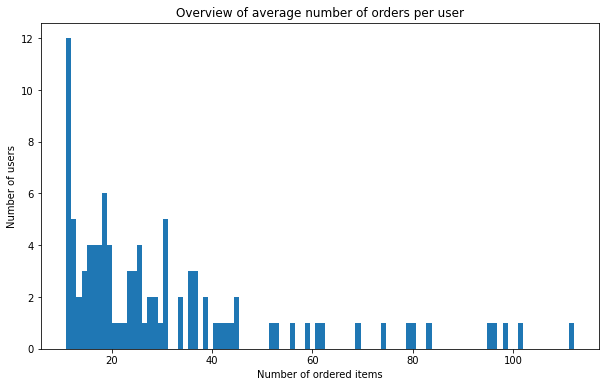

In [308]:
plt.figure(figsize=(10, 6))
plt.hist(order_counts,bins=100)
plt.title('Overview of average number of orders per user')
plt.xlabel('Number of ordered items')
plt.ylabel('Number of users');

In [309]:
interactions_counts = df_user_interactions.groupby('user_objectid').size()

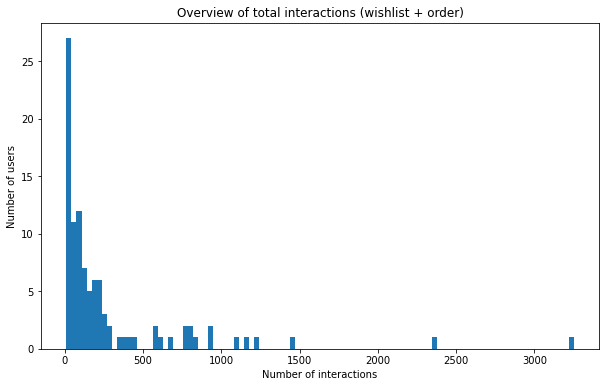

In [310]:
plt.figure(figsize=(10, 6))
plt.hist(interactions_counts,bins=100)
plt.title('Overview of total interactions (wishlist + order)')
plt.xlabel('Number of interactions')
plt.ylabel('Number of users');

In [311]:
interactions_counts.min()

11

In [312]:
interactions_counts.median()

108.0

<h4>Fixing Live item data</h4>

In [313]:
df_live_item_data.describe()

,item_objectid,metadata,category,image
count,10000,10000,10000,10000
unique,10000,9978,166,9998
top,006kWc5eAJ,"{'type': 'Bracelet', 'brand': 'Pearls for Girls', 'charm': '3', 'color': ['Black', 'Multicolored...",Clothing > Dresses > Dresses,https://prod.files.sellpy.net/photoRobot-standard-metro/ICr8TrD8vT-fc75-0.jpg
freq,1,3,1327,2


In [314]:
df_live_item_data['metadata'] = df_live_item_data['metadata'].apply(ast.literal_eval)

# Extract values into separate columns
df_live_item_data['size'] = df_live_item_data['metadata'].apply(lambda x: x.get('size'))
df_live_item_data['type'] = df_live_item_data['metadata'].apply(lambda x: x.get('type'))
df_live_item_data['brand'] = df_live_item_data['metadata'].apply(lambda x: x.get('brand'))
df_live_item_data['color'] = df_live_item_data['metadata'].apply(lambda x: x.get('color'))
df_live_item_data['pattern'] = df_live_item_data['metadata'].apply(lambda x: x.get('pattern'))
df_live_item_data['material'] = df_live_item_data['metadata'].apply(lambda x: x.get('material'))
df_live_item_data['neckline'] = df_live_item_data['metadata'].apply(lambda x: x.get('neckline'))
df_live_item_data['condition'] = df_live_item_data['metadata'].apply(lambda x: x.get('condition'))
df_live_item_data['demography'] = df_live_item_data['metadata'].apply(lambda x: x.get('demography'))
df_live_item_data['sleeveLength'] = df_live_item_data['metadata'].apply(lambda x: x.get('sleeveLength'))
df_live_item_data['garmentLength'] = df_live_item_data['metadata'].apply(lambda x: x.get('garmentLength'))

In [315]:
df_live_item_data['color'] = df_live_item_data['color'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
df_live_item_data['material'] = df_live_item_data['material'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [316]:
df_live_item_data.head()

,item_objectid,metadata,category,image,size,type,brand,color,pattern,material,neckline,condition,demography,sleeveLength,garmentLength
0,006kWc5eAJ,"{'size': 'CHILD-CM-80', 'type': 'Sweater', 'brand': 'Newbie By Kappahl', 'color': ['Brown'], 'fa...",Clothing > Sweaters & Cardigans > Sweaters,https://prod.files.sellpy.net/photoRobot-fixed-hamm-g-4/006kWc5eAJ-fb32-0-timed-sequence.jpg,CHILD-CM-80,Sweater,Newbie By Kappahl,Brown,Other,Organic cotton,None,Acceptable,Boys,Long sleeves,None
1,008p9xonSn,"{'size': 'WMN-EU-40', 'type': 'Jumpsuit', 'brand': 'H&M Coachella', 'color': ['Black'], 'pattern...",Clothing > Jumpsuits & Sets > Jumpsuits,https://prod.files.sellpy.net/photoRobot-standard-williams-g-4/008p9xonSn-ab6f-0.jpg,WMN-EU-40,Jumpsuit,H&M Coachella,Black,Other,"Polyester, Polyamide",None,Good,Women,None,None
2,00AgUuWStc,"{'size': 'WMN-INT-L', 'type': 'Sweatshirt', 'brand': 'Sail Racing', 'color': ['Pink'], 'fabric':...",Clothing > Sweaters & Cardigans > Hoodies & Sweatshirts,https://prod.files.sellpy.net/photoRobot-standard-centrum/00AgUuWStc-f6d1-0.jpg,WMN-INT-L,Sweatshirt,Sail Racing,Pink,Monochrome,"Polyester, Cotton",Round neck,Acceptable,Women,Long sleeves,None
3,011XUHF73W,"{'size': 'WMN-INT-L', 'type': 'Dress', 'brand': 'Saint Tropez', 'color': ['Black'], 'pattern': '...",Clothing > Dresses > Dresses,https://prod.files.sellpy.net/photoRobot-standard-fomu-g-1/011XUHF73W-1776-0.jpg,WMN-INT-L,Dress,Saint Tropez,Black,Monochrome,"Viscose, Elastane, Polyester",V-neck,Good,Women,Three-quarter sleeve,Mini
4,012OTXQwjT,"{'type': 'Sports bag', 'brand': 'Adidas', 'color': ['Red'], 'defects': [{'id': '2925896182', 'ty...",Accessories > Bags,https://prod.files.sellpy.net/photoRobot-fixed-morat-g-3/012OTXQwjT-7ab8-0-timed-sequence.jpg,None,Sports bag,Adidas,Red,Print,None,None,Acceptable,Unisex (Adults),None,None


In [317]:
df_live_item_data=df_live_item_data.drop(['metadata','image'], axis=1)

In [318]:
def extract_main_brand(brand_name, keywords):
    if isinstance(brand_name, str):
        for keyword in keywords:
            if keyword in brand_name:
                return keyword
    return brand_name

In [319]:
keyword = ['H&M', 'Lindex', 'Gina Tricot', 'Zara', 'Kappahl', 'VILA', 'NLY']
df_live_item_data['main_brand'] = df_live_item_data['brand'].apply(lambda x: extract_main_brand(x, keyword))

In [320]:
def extract_main_category(text):
    if '>' in text:
        return text.split('>')[0].strip()
    else:
        return text
    
df_live_item_data['main_category'] = df_live_item_data['category'].apply(extract_main_category)

In [321]:
def extract_second_category(text):
    if '>' in text:
        return text.split('>')[1].strip()
    else:
        return text
    
df_live_item_data['second_category'] = df_live_item_data['category'].apply(extract_second_category)

In [322]:
df_live_item_data.T.apply(lambda x: x.nunique(), axis=1)

item_objectid      10000
category             166
size                 260
type                 479
brand               2066
color                245
pattern               19
material             525
neckline               5
condition              5
demography             6
sleeveLength           4
garmentLength          3
main_brand          1961
main_category         10
second_category       80
dtype: int64

In [323]:
df_live_item_data['main_brand'].value_counts().nlargest(10)

main_brand
H&M            1365
Zara            450
Lindex          412
Gina Tricot     247
Shein           243
Adidas          156
NLY             150
Nike            126
KappAhl         125
Monki           114
Name: count, dtype: int64

In [324]:
df_user_data_past_purchases['main_brand'].value_counts().nlargest(10)

main_brand
H&M                  3000
Zara                 1253
Lindex                535
Levi Strauss & Co     415
Gina Tricot           370
NLY                   319
Shein                 300
Monki                 292
& Other Stories       279
Adidas                279
Name: count, dtype: int64

In [325]:
pd.set_option('display.max_rows', 300)
#df_live_item_data.groupby('second_category').count()

In [326]:
df_live_item_data.isna().sum()

item_objectid         0
category              0
size                637
type                  0
brand               575
color               111
pattern            1730
material           2520
neckline           6908
condition             0
demography          319
sleeveLength       5085
garmentLength      8451
main_brand          575
main_category         0
second_category       0
dtype: int64

In [327]:
df_live_item_data

,item_objectid,category,size,type,brand,color,pattern,material,neckline,condition,demography,sleeveLength,garmentLength,main_brand,main_category,second_category
0,006kWc5eAJ,Clothing > Sweaters & Cardigans > Sweaters,CHILD-CM-80,Sweater,Newbie By Kappahl,Brown,Other,Organic cotton,None,Acceptable,Boys,Long sleeves,None,Kappahl,Clothing,Sweaters & Cardigans
1,008p9xonSn,Clothing > Jumpsuits & Sets > Jumpsuits,WMN-EU-40,Jumpsuit,H&M Coachella,Black,Other,"Polyester, Polyamide",None,Good,Women,None,None,H&M,Clothing,Jumpsuits & Sets
2,00AgUuWStc,Clothing > Sweaters & Cardigans > Hoodies & Sweatshirts,WMN-INT-L,Sweatshirt,Sail Racing,Pink,Monochrome,"Polyester, Cotton",Round neck,Acceptable,Women,Long sleeves,None,Sail Racing,Clothing,Sweaters & Cardigans
3,011XUHF73W,Clothing > Dresses > Dresses,WMN-INT-L,Dress,Saint Tropez,Black,Monochrome,"Viscose, Elastane, Polyester",V-neck,Good,Women,Three-quarter sleeve,Mini,Saint Tropez,Clothing,Dresses
4,012OTXQwjT,Accessories > Bags,None,Sports bag,Adidas,Red,Print,None,None,Acceptable,Unisex (Adults),None,None,Adidas,Accessories,Bags
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,zZmS5zVj2a,Clothing > Sweaters & Cardigans > Sweaters,CHILD-CM-170,Sweater,KappAhl,Pink,None,Acrylic,Boat neck,Good,Girls,Long sleeves,None,KappAhl,Clothing,Sweaters & Cardigans
9996,zzsSIDLdRB,Clothing > Shirts & Blouses > Blouses,WMN-INT-S,Blouse,Divided by H&M,Black,Monochrome,"Polyester, Elastane",V-neck,Good,Women,Long sleeves,None,H&M,Clothing,Shirts & Blouses
9997,zZVRB4LOEc,Clothing > Pants & Jeans > Jeans,WMN-EU-34,Jeans,Pull & Bear,Blue,Monochrome,"Elastane, Cotton",None,Good,Women,None,None,Pull & Bear,Clothing,Pants & Jeans
9998,ZZwKxdN1EQ,Clothing > Pants & Jeans > Jeans,CHILD-CM-92,Jeans,Blue Effect,Blue,Monochrome,Cotton,None,Good,Unisex (Kids),None,None,Blue Effect,Clothing,Pants & Jeans


In [328]:
df_live_item_data.columns

Index(['item_objectid', 'category', 'size', 'type', 'brand', 'color',
       'pattern', 'material', 'neckline', 'condition', 'demography',
       'sleeveLength', 'garmentLength', 'main_brand', 'main_category',
       'second_category'],
      dtype='object')

In [329]:
df_live_item_data_encoded=df_live_item_data.copy()

In [330]:
def freq_encoding(column):
    frequency_map = column.value_counts(normalize=True).to_dict()
    return column.map(frequency_map)

In [331]:
columns_to_encode = ['size', 'main_brand', 'color','material','condition',
                     'second_category','garmentLength','sleeveLength','neckline','pattern']

for col in columns_to_encode:
    df_live_item_data_encoded[col+'_encoded'] = freq_encoding(df_live_item_data_encoded[col])

In [332]:
df_live_item_data_encoded=df_live_item_data_encoded[['item_objectid','demography','main_category',
       'size_encoded', 'color_encoded',
       'material_encoded', 'condition_encoded',
       'second_category_encoded', 'garmentLength_encoded',
       'sleeveLength_encoded', 'neckline_encoded', 'pattern_encoded',
       'main_brand_encoded']]

In [333]:
df_item_encoded = pd.get_dummies(df_live_item_data_encoded, columns=['demography','main_category'],dtype=int)

In [334]:
df_item_encoded = df_item_encoded.fillna(0)

In [335]:
df_item_encoded.head()

,item_objectid,size_encoded,color_encoded,material_encoded,condition_encoded,second_category_encoded,garmentLength_encoded,sleeveLength_encoded,neckline_encoded,pattern_encoded,main_brand_encoded,demography_Boys,demography_Girls,demography_Men,demography_Unisex (Adults),demography_Unisex (Kids),demography_Women,main_category_Accessories,main_category_Beauty,main_category_Children's articles & Toys,main_category_Clothing,main_category_Consumer Electronics,main_category_Furniture & Decor,main_category_Home,main_category_Leisure,main_category_Media & Gaming,main_category_Shoes
0,006kWc5eAJ,0.006515,0.029629,0.010829,0.1599,0.1178,0.000000,0.531231,0.000000,0.146312,0.010292,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,008p9xonSn,0.026380,0.208515,0.002540,0.6699,0.0346,0.000000,0.000000,0.000000,0.146312,0.144828,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,00AgUuWStc,0.053295,0.056022,0.030348,0.1599,0.1178,0.000000,0.531231,0.629366,0.636397,0.000849,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,011XUHF73W,0.053295,0.208515,0.005481,0.6699,0.1347,0.358296,0.046796,0.253234,0.636397,0.001910,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,012OTXQwjT,0.000000,0.033269,0.000000,0.1599,0.0124,0.000000,0.000000,0.000000,0.076904,0.016552,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [336]:
df_item_encoded.columns

Index(['item_objectid', 'size_encoded', 'color_encoded', 'material_encoded',
       'condition_encoded', 'second_category_encoded', 'garmentLength_encoded',
       'sleeveLength_encoded', 'neckline_encoded', 'pattern_encoded',
       'main_brand_encoded', 'demography_Boys', 'demography_Girls',
       'demography_Men', 'demography_Unisex (Adults)',
       'demography_Unisex (Kids)', 'demography_Women',
       'main_category_Accessories', 'main_category_Beauty',
       'main_category_Children's articles & Toys', 'main_category_Clothing',
       'main_category_Consumer Electronics', 'main_category_Furniture & Decor',
       'main_category_Home', 'main_category_Leisure',
       'main_category_Media & Gaming', 'main_category_Shoes'],
      dtype='object')

<h3>Fixing User Purchase data</h3>

In [337]:
df_interactions.isna().sum()

user_objectid       0
item_objectid       0
interaction_type    0
createdat           0
metadata            1
category            0
image               0
main_category       0
dtype: int64

In [338]:
df_user_data_past_purchases = df_interactions.dropna().reset_index(drop=True)

In [339]:
df_user_data_past_purchases.head()

,user_objectid,item_objectid,interaction_type,createdat,metadata,category,image,main_category
0,01d8CuzSnr,SPGdb5DcAF,wishlist,2022-02-26T23:43:16.037Z,"{'type': 'Notepad', 'brand': 'FSC', 'condition': 'New', 'measurement': {'widthInCm': 21, 'length...",Home > Office > Other,https://prod.files.sellpy.net/photoRobot-fixed-morat-g-3/SPGdb5DcAF-4a96-0-timed-sequence.jpg,Home
1,02AkaUhITO,r0p6IGXjgt,order,2022-04-28T23:27:37.158Z,"{'size': 'PANTS-INCH-27', 'type': 'Jeans', 'brand': 'Lee', 'color': ['Black'], 'pattern': 'Monoc...",Clothing > Pants & Jeans > Jeans,https://prod.files.sellpy.net/photoRobot-hanging-wise-g-2/r0p6IGXjgt-2d14-0.jpg,Clothing
2,02dSnWTUGU,xRhYBpDNqM,wishlist,2022-08-17T00:36:07.107Z,"{'type': 'Shoulder-bag', 'color': ['Brown', 'Multicolored'], 'material': ['Cotton'], 'condition'...",Accessories > Bags,https://prod.files.sellpy.net/photoRobot-fixed-hamm-g-4/xRhYBpDNqM-e7a6-0-timed-sequence.jpg,Accessories
3,01Oceyt3ZP,PyjChJEkBw,order,2022-09-05T19:34:19.553Z,"{'size': 'WMN-INT-S/M', 'type': 'Top', 'brand': 'Carin Wester', 'color': ['Black'], 'pattern': '...",Clothing > Tops,https://prod.files.sellpy.net/photoRobot-standard-fait-g-1/Bf02ZnUtig-8799-0.jpg,Clothing
4,00wGE6lNGR,DN4SacCG98,order,2022-09-27T19:29:47.646Z,"{'size': 'WMN-INT-XS', 'type': 'Bolero', 'brand': 'VILA Clothes', 'color': ['Gray'], 'material':...",Clothing > Sweaters & Cardigans > Cardigans,https://prod.files.sellpy.net/photoRobot-standard-fraenkel-g-3/DN4SacCG98-84ce-0.jpg,Clothing


In [340]:
df_user_data_past_purchases['metadata'] = df_user_data_past_purchases['metadata'].apply(ast.literal_eval)

df_user_data_past_purchases['size'] = df_user_data_past_purchases['metadata'].apply(lambda x: x.get('size'))
df_user_data_past_purchases['type'] = df_user_data_past_purchases['metadata'].apply(lambda x: x.get('type'))
df_user_data_past_purchases['brand'] = df_user_data_past_purchases['metadata'].apply(lambda x: x.get('brand'))
df_user_data_past_purchases['color'] = df_user_data_past_purchases['metadata'].apply(lambda x: x.get('color'))
df_user_data_past_purchases['pattern'] = df_user_data_past_purchases['metadata'].apply(lambda x: x.get('pattern'))
df_user_data_past_purchases['material'] = df_user_data_past_purchases['metadata'].apply(lambda x: x.get('material'))
df_user_data_past_purchases['neckline'] = df_user_data_past_purchases['metadata'].apply(lambda x: x.get('neckline'))
df_user_data_past_purchases['condition'] = df_user_data_past_purchases['metadata'].apply(lambda x: x.get('condition'))
df_user_data_past_purchases['demography'] = df_user_data_past_purchases['metadata'].apply(lambda x: x.get('demography'))
df_user_data_past_purchases['sleeveLength'] = df_user_data_past_purchases['metadata'].apply(lambda x: x.get('sleeveLength'))
df_user_data_past_purchases['garmentLength'] = df_user_data_past_purchases['metadata'].apply(lambda x: x.get('garmentLength'))

In [341]:
df_user_data_past_purchases['color'] = df_user_data_past_purchases['color'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
df_user_data_past_purchases['material'] = df_user_data_past_purchases['material'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [342]:
df_user_data_past_purchases=df_user_data_past_purchases.drop(['metadata','image','createdat'], axis=1)

In [343]:
def extract_second_category(text):
    if '>' in text:
        return text.split('>')[1].strip()
    else:
        return text
    
df_user_data_past_purchases['second_category'] = df_user_data_past_purchases['category'].apply(extract_second_category)

In [344]:
df_user_data_past_purchases['main_brand'] = df_user_data_past_purchases['brand'].apply(lambda x: extract_main_brand(x, keyword))

In [345]:
df_user_data_past_purchases.head()

,user_objectid,item_objectid,interaction_type,category,main_category,size,type,brand,color,pattern,material,neckline,condition,demography,sleeveLength,garmentLength,second_category,main_brand
0,01d8CuzSnr,SPGdb5DcAF,wishlist,Home > Office > Other,Home,None,Notepad,FSC,None,None,None,None,New,None,None,None,Office,FSC
1,02AkaUhITO,r0p6IGXjgt,order,Clothing > Pants & Jeans > Jeans,Clothing,PANTS-INCH-27,Jeans,Lee,Black,Monochrome,"Viscose, Polyester, Cotton",None,Good,Women,None,None,Pants & Jeans,Lee
2,02dSnWTUGU,xRhYBpDNqM,wishlist,Accessories > Bags,Accessories,None,Shoulder-bag,None,"Brown, Multicolored",None,Cotton,None,Very good,Women,None,None,Bags,None
3,01Oceyt3ZP,PyjChJEkBw,order,Clothing > Tops,Clothing,WMN-INT-S/M,Top,Carin Wester,Black,Monochrome,"Viscose, Polyester",Round neck,Good,Women,Long sleeves,None,Tops,Carin Wester
4,00wGE6lNGR,DN4SacCG98,order,Clothing > Sweaters & Cardigans > Cardigans,Clothing,WMN-INT-XS,Bolero,VILA Clothes,Gray,None,"Polyester, Elastane, Viscose",None,Good,Women,Short sleeves,None,Sweaters & Cardigans,VILA


In [346]:
#df_user_data_past_purchases = df_user_data_past_purchases.merge(df_user_features, on = 'user_objectid', how = 'left')

In [347]:
df_user_data_past_purchases.columns

Index(['user_objectid', 'item_objectid', 'interaction_type', 'category',
       'main_category', 'size', 'type', 'brand', 'color', 'pattern',
       'material', 'neckline', 'condition', 'demography', 'sleeveLength',
       'garmentLength', 'second_category', 'main_brand'],
      dtype='object')

In [348]:
df_user_data_encoded=df_user_data_past_purchases.copy()

In [349]:
df_user_data_encoded=df_user_data_past_purchases[['user_objectid', 'item_objectid','interaction_type',
       'main_category', 'size', 'color', 'pattern',
       'material', 'neckline', 'condition', 'demography', 'sleeveLength',
       'garmentLength', 'main_brand', 'second_category']]

In [350]:
columns_to_encode = ['size', 'main_brand', 'color','material','condition',
                     'second_category','garmentLength','sleeveLength','neckline','pattern']

for col in columns_to_encode:
    df_user_data_encoded[col+'_encoded'] = freq_encoding(df_user_data_encoded[col])

<ipython-input-350-2dfd169e16fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_data_encoded[col+'_encoded'] = freq_encoding(df_user_data_encoded[col])
<ipython-input-350-2dfd169e16fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_data_encoded[col+'_encoded'] = freq_encoding(df_user_data_encoded[col])


In [351]:
df_user_data_encoded = pd.get_dummies(df_user_data_encoded, columns=['demography','main_category'],dtype=int)

In [352]:
df_user_data_encoded.columns

Index(['user_objectid', 'item_objectid', 'interaction_type', 'size', 'color',
       'pattern', 'material', 'neckline', 'condition', 'sleeveLength',
       'garmentLength', 'main_brand', 'second_category', 'size_encoded',
       'main_brand_encoded', 'color_encoded', 'material_encoded',
       'condition_encoded', 'second_category_encoded', 'garmentLength_encoded',
       'sleeveLength_encoded', 'neckline_encoded', 'pattern_encoded',
       'demography_Boys', 'demography_Girls', 'demography_Men',
       'demography_Unisex (Adults)', 'demography_Unisex (Kids)',
       'demography_Women', 'main_category_Accessories', 'main_category_Beauty',
       'main_category_Children's articles & Toys', 'main_category_Clothing',
       'main_category_Consumer Electronics', 'main_category_Furniture & Decor',
       'main_category_Home', 'main_category_Leisure',
       'main_category_Media & Gaming', 'main_category_Shoes'],
      dtype='object')

In [353]:
df_user_data_encoded=df_user_data_encoded.drop(columns=['size', 'color', 'pattern',
       'material', 'neckline', 'condition', 'sleeveLength', 'garmentLength',
       'main_brand', 'second_category'])

In [354]:
df_user_data_encoded=df_user_data_encoded.fillna(0)

In [355]:
df_user_data_encoded.head()

,user_objectid,item_objectid,interaction_type,size_encoded,main_brand_encoded,color_encoded,material_encoded,condition_encoded,second_category_encoded,garmentLength_encoded,sleeveLength_encoded,neckline_encoded,pattern_encoded,demography_Boys,demography_Girls,demography_Men,demography_Unisex (Adults),demography_Unisex (Kids),demography_Women,main_category_Accessories,main_category_Beauty,main_category_Children's articles & Toys,main_category_Clothing,main_category_Consumer Electronics,main_category_Furniture & Decor,main_category_Home,main_category_Leisure,main_category_Media & Gaming,main_category_Shoes
0,01d8CuzSnr,SPGdb5DcAF,wishlist,0.000000,0.000240,0.000000,0.000000,0.107272,0.009391,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,02AkaUhITO,r0p6IGXjgt,order,0.003682,0.003206,0.233445,0.000506,0.527110,0.107130,0.0,0.000000,0.000000,0.619837,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,02dSnWTUGU,xRhYBpDNqM,wishlist,0.000000,0.000000,0.003652,0.180010,0.217131,0.041392,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,01Oceyt3ZP,PyjChJEkBw,order,0.016616,0.007774,0.233445,0.008708,0.527110,0.056772,0.0,0.591996,0.578403,0.619837,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,00wGE6lNGR,DN4SacCG98,order,0.051599,0.004127,0.065739,0.002472,0.527110,0.112800,0.0,0.148942,0.000000,0.000000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [356]:
df_item_encoded.columns

Index(['item_objectid', 'size_encoded', 'color_encoded', 'material_encoded',
       'condition_encoded', 'second_category_encoded', 'garmentLength_encoded',
       'sleeveLength_encoded', 'neckline_encoded', 'pattern_encoded',
       'main_brand_encoded', 'demography_Boys', 'demography_Girls',
       'demography_Men', 'demography_Unisex (Adults)',
       'demography_Unisex (Kids)', 'demography_Women',
       'main_category_Accessories', 'main_category_Beauty',
       'main_category_Children's articles & Toys', 'main_category_Clothing',
       'main_category_Consumer Electronics', 'main_category_Furniture & Decor',
       'main_category_Home', 'main_category_Leisure',
       'main_category_Media & Gaming', 'main_category_Shoes'],
      dtype='object')

<h3>Recommendations</h3>

In [357]:
item_features = df_item_encoded.drop(columns=['item_objectid'])
item_sim_matrix = cosine_similarity(item_features)

In [358]:
item_sim_matrix

array([[1.        , 0.46769847, 0.52318743, ..., 0.46873494, 0.46632229,
        0.04518446],
       [0.46769847, 1.        , 0.78707107, ..., 0.95127543, 0.57866318,
        0.58371309],
       [0.52318743, 0.78707107, 1.        , ..., 0.84317796, 0.50920959,
        0.40054815],
       ...,
       [0.46873494, 0.95127543, 0.84317796, ..., 1.        , 0.65310823,
        0.54536601],
       [0.46632229, 0.57866318, 0.50920959, ..., 0.65310823, 1.        ,
        0.16911022],
       [0.04518446, 0.58371309, 0.40054815, ..., 0.54536601, 0.16911022,
        1.        ]])

In [359]:
item_sim_matrix.shape

(10000, 10000)

In [360]:
user_interactions = defaultdict(list)

for _, row in df_user_data_encoded.iterrows():
    user_interactions[row['user_objectid']].append(row.drop(['user_objectid', 'interaction_type','item_objectid']))

In [368]:
def recommend_items(user_id, num_recommendations = 10):
    interactions = user_interactions[user_id]
    recommended_items = defaultdict(float)
    
    for interaction in interactions:
        interaction_features = interaction.values.reshape(1, -1)
        sim_scores = cosine_similarity(interaction_features, item_features)
        sim_scores = sim_scores.flatten()
        related_indexes = sim_scores.argsort()[::-1][:num_recommendations]
        
        for index in related_indexes:
            recommended_items[df_item_encoded['item_objectid'].iloc[index]] += sim_scores[index]
    
    recommended_items = sorted(recommended_items.items(), key=lambda x: x[1], reverse=True)[:num_recommendations]
    return recommended_items


In [362]:
all_recommendations = {}

for user_id in user_interactions.keys():
    recommendations = recommend_items(user_id)
    all_recommendations[user_id] = recommendations

for user_id, recommendations in all_recommendations.items():
    print(f"Recommendations for user {user_id}:")
    for item_id, score in recommendations:
        print(f"Item ID: {item_id}, Score: {score}")
    print("\n")

Recommendations for user 01d8CuzSnr:
Item ID: YeL109BS7K, Score: 616.965116728659
Item ID: 60m6HIvDiz, Score: 616.962864063023
Item ID: nocQzDeZjA, Score: 609.1392640344893


Recommendations for user 02AkaUhITO:
Item ID: 0XGV4bIGMc, Score: 14.175834341030832
Item ID: AChNA4yLVd, Score: 11.163635326701757
Item ID: 8EZ9OuVGE8, Score: 11.084572827036109


Recommendations for user 02dSnWTUGU:
Item ID: dYibwjiiEH, Score: 53.83404484320021
Item ID: PmCDW8yBBl, Score: 53.83389841285473
Item ID: Ma8EshchV1, Score: 53.611967508656946


Recommendations for user 01Oceyt3ZP:
Item ID: 0XGV4bIGMc, Score: 17.594203049786515
Item ID: aL5khQlAGK, Score: 16.96912815444715
Item ID: a4Y5rYvcvM, Score: 15.906482014306993


Recommendations for user 00wGE6lNGR:
Item ID: Hl6FdIZSlp, Score: 31.67613426319119
Item ID: asFfSMDOkX, Score: 26.14540274347785
Item ID: xKVmY87HEw, Score: 25.15340000579186


Recommendations for user 00SKNKLWj4:
Item ID: YeL109BS7K, Score: 278.2670420083793
Item ID: 60m6HIvDiz, Score: 

In [369]:
user_id = '00GV5UFSoZ'
recommendations = recommend_items(user_id)

print(f"Top 10 recommendations for user {user_id}:")
for item_id, score in recommendations:
    print(f"Item ID: {item_id}, Score: {score}")

Top 10 recommendations for user 00GV5UFSoZ:
Item ID: cYKbfOA2uC, Score: 34.96053210530175
Item ID: Xv0Dl1WiBj, Score: 32.879034064845584
Item ID: MRtujaUf0B, Score: 32.028733687326934
Item ID: eKBHejv7la, Score: 30.15698121680598
Item ID: d9xMhhpkFZ, Score: 30.104611398809073
Item ID: oBtG6Im3FR, Score: 29.791137583142927
Item ID: KZCUZLe4S3, Score: 28.148582280817514
Item ID: y7TiZdOoTc, Score: 27.401227616021178
Item ID: 9qWOl9plyt, Score: 21.53279286708905
Item ID: o2e3mznn1x, Score: 21.497569277962736


In [370]:
df_user_data_past_purchases.loc[df_user_data_past_purchases['user_objectid'] == '00GV5UFSoZ']

,user_objectid,item_objectid,interaction_type,category,main_category,size,type,brand,color,pattern,material,neckline,condition,demography,sleeveLength,garmentLength,second_category,main_brand
1694,00GV5UFSoZ,IZY0CB8ld8,wishlist,Clothing > Pants & Jeans > Pants,Clothing,MEN-EU-42,Pants,Bik Bok,Black,Monochrome,"Elastane, Polyester",None,New,Men,None,None,Pants & Jeans,Bik Bok
2625,00GV5UFSoZ,AxN6Dc2OkO,wishlist,Clothing > Pants & Jeans > Pants,Clothing,MEN-INT-M,Sweatpants,Puma,Blue,Monochrome,"Elastane, Polyester",None,New,Men,None,None,Pants & Jeans,Puma
2943,00GV5UFSoZ,tCvNUnv8rM,wishlist,Clothing > Sweaters & Cardigans > Sweaters,Clothing,MEN-INT-M,Turtleneck,Cool Wear,Purple,Monochrome,Cotton,None,New,Men,Long sleeves,None,Sweaters & Cardigans,Cool Wear
3503,00GV5UFSoZ,MLByL1b5zU,wishlist,Clothing > Pants & Jeans > Pants,Clothing,MEN-INT-M,Sweatpants,Crivit,Gray,Monochrome,"Cotton, Polyester",None,New,Men,None,None,Pants & Jeans,Crivit
4244,00GV5UFSoZ,VUfV3sozY7,wishlist,Clothing > Pants & Jeans > Pants,Clothing,MEN-INT-M,Pants,Jack & Jones,Green,None,"Cotton, Linen, Elastane",None,Very good,Men,None,None,Pants & Jeans,Jack & Jones
4356,00GV5UFSoZ,nQTJDnhImc,wishlist,Clothing > Pants & Jeans > Pants,Clothing,PANTS-INCH-32,Pants,Moul,Beige,None,"Cotton, Elastane",None,Very good,Men,None,None,Pants & Jeans,Moul
5398,00GV5UFSoZ,GsxYFZoQ6O,wishlist,Clothing > Pants & Jeans > Pants,Clothing,MEN-INT-S/M,Pants,Up2Fashion,Blue,Checked,"Polyester, Viscose, Elastane",None,New,Men,None,None,Pants & Jeans,Up2Fashion
5689,00GV5UFSoZ,HYZiBEEEON,order,Clothing > Pants & Jeans > Pants,Clothing,MEN-INT-L,Pants,Shaping New Tomorrow,Green,None,None,None,Very good,Men,None,None,Pants & Jeans,Shaping New Tomorrow
6312,00GV5UFSoZ,Blz9H89xON,order,Clothing > Sweaters & Cardigans > Sweaters,Clothing,MEN-INT-M,Sweater,Q/S by s.Oliver,Gray,Monochrome,Cotton,Round neck,Very good,Men,Long sleeves,None,Sweaters & Cardigans,Q/S by s.Oliver
6534,00GV5UFSoZ,oL5tWYIFlW,order,Clothing > Pants & Jeans > Pants,Clothing,PANTS-INCH-32,Pants,Topman,Blue,None,"Cotton, Elastane",None,Good,Men,None,None,Pants & Jeans,Topman


In [374]:
pd.set_option('display.max_columns', 500)
rec_list = ['cYKbfOA2uC',
'Xv0Dl1WiBj',
'MRtujaUf0B',
'eKBHejv7la',
'd9xMhhpkFZ',
'oBtG6Im3FR', 
'KZCUZLe4S3', 
'y7TiZdOoTc',
'9qWOl9plyt',
'o2e3mznn1x']

In [375]:
df_live_item_data.loc[df_live_item_data['item_objectid'].isin(rec_list)]

,item_objectid,category,size,type,brand,color,pattern,material,neckline,condition,demography,sleeveLength,garmentLength,main_brand,main_category,second_category
1797,9qWOl9plyt,Clothing > Blazers & Suits > Suits,MEN-EU-46,Suit,H&M,Gray,Houndstooth,"Wool, Polyester, Viscose",None,Acceptable,Men,None,None,H&M,Clothing,Blazers & Suits
3190,cYKbfOA2uC,Clothing > Pants & Jeans > Pants,MEN-EU-40,Pants,Zara Man,Gray,None,None,None,Very good,Men,None,None,Zara,Clothing,Pants & Jeans
3258,d9xMhhpkFZ,Clothing > Shirts & Blouses > Shirts,MEN-EU_COLLAR-41,Shirt,Eton,Cream,None,None,None,Normal,Men,None,None,Eton,Clothing,Shirts & Blouses
3665,eKBHejv7la,Clothing > Jackets & Outerwear > Jackets,MEN-INT-L,Bomber jacket,boohoo MAN,Green,None,None,None,New,Men,None,None,boohoo MAN,Clothing,Jackets & Outerwear
5694,KZCUZLe4S3,Clothing > T-shirts & Tank tops > Short-sleeved,MEN-INT-M,T-shirt,Polo Ralph Lauren,Blue,None,None,None,Normal,Men,None,None,Polo Ralph Lauren,Clothing,T-shirts & Tank tops
6199,MRtujaUf0B,Clothing > Sweaters & Cardigans > Sweaters,MEN-INT-M/L,Sweater,Weimostar,"Dark blue, Blue",Striped,None,None,Normal,Men,None,None,Weimostar,Clothing,Sweaters & Cardigans
6551,o2e3mznn1x,Clothing > Jackets & Outerwear > Jackets,MEN-INT-XXL,Biker jacket,H&M,Black,None,"Faux leather, Polyester",None,Very good,Men,None,None,H&M,Clothing,Jackets & Outerwear
6588,oBtG6Im3FR,Clothing > Sportswear > Bottoms,MEN-INT-S,Sports shorts,Nike,White,Print,Polyester,None,Acceptable,Men,None,None,Nike,Clothing,Sportswear
9374,Xv0Dl1WiBj,Clothing > Pants & Jeans > Pants,MEN-EU-44,Cargo pants,Fransa,Green,Camouflage,"Cotton, Elastane",None,Acceptable,Men,None,None,Fransa,Clothing,Pants & Jeans
9464,y7TiZdOoTc,Clothing > Pants & Jeans > Pants,MEN-INT-XL,Pants,Uniqlo,Beige,Striped,"Linen, Cotton",None,Acceptable,Men,None,None,Uniqlo,Clothing,Pants & Jeans


In [376]:
pd.options.display.max_colwidth = 100
df_live_item_data_raw = pd.read_csv('live_item_data.csv')
df_live_item_data_raw.loc[df_live_item_data_raw['item_objectid'].isin(rec_list)]

,item_objectid,metadata,category,image
1797,9qWOl9plyt,"{'size': 'MEN-EU-46', 'type': 'Suit', 'brand': 'H&M', 'color': ['Gray'], 'defects': [{'id': '505...",Clothing > Blazers & Suits > Suits,https://prod.files.sellpy.net/photoRobot-standard-jordan-g-4/9qWOl9plyt-a7d6-0.jpg
3190,cYKbfOA2uC,"{'size': 'MEN-EU-40', 'type': 'Pants', 'brand': 'Zara Man', 'color': ['Gray'], 'condition': 'Ver...",Clothing > Pants & Jeans > Pants,https://prod.files.sellpy.net/photoRobot-hanging-graf-g-4/cYKbfOA2uC-3b4c-0.jpg
3258,d9xMhhpkFZ,"{'size': 'MEN-EU_COLLAR-41', 'type': 'Shirt', 'brand': 'Eton', 'color': ['Cream'], 'condition': ...",Clothing > Shirts & Blouses > Shirts,https://prod.files.sellpy.net/photoRobot-boone/d9xMhhpkFZ-8392-0.jpg
3665,eKBHejv7la,"{'size': 'MEN-INT-L', 'type': 'Bomber jacket', 'brand': 'boohoo MAN', 'color': ['Green'], 'model...",Clothing > Jackets & Outerwear > Jackets,https://prod.files.sellpy.net/photoRobot-metro/eKBHejv7la-6e74-0.jpg
5694,KZCUZLe4S3,"{'size': 'MEN-INT-M', 'type': 'T-shirt', 'brand': 'Polo Ralph Lauren', 'color': ['Blue'], 'condi...",Clothing > T-shirts & Tank tops > Short-sleeved,https://prod.files.sellpy.net/photoRobot-gagosian/resizedc-KZCUZLe4S3-0683-0.jpg
6199,MRtujaUf0B,"{'size': 'MEN-INT-M/L', 'type': 'Sweater', 'brand': 'Weimostar', 'color': ['Dark blue', 'Blue'],...",Clothing > Sweaters & Cardigans > Sweaters,https://prod.files.sellpy.net/photoRobot-gagosian/MRtujaUf0B-c959-0.jpg
6551,o2e3mznn1x,"{'size': 'MEN-INT-XXL', 'type': 'Biker jacket', 'brand': 'H&M', 'color': ['Black'], 'material': ...",Clothing > Jackets & Outerwear > Jackets,https://prod.files.sellpy.net/photoRobot-cooper/o2e3mznn1x-9430-0.jpg
6588,oBtG6Im3FR,"{'size': 'MEN-INT-S', 'type': 'Sports shorts', 'brand': 'Nike', 'color': ['White'], 'defects': [...",Clothing > Sportswear > Bottoms,https://prod.files.sellpy.net/photoRobot-hanging-federer-g-4/oBtG6Im3FR-b945-0.jpg
9374,Xv0Dl1WiBj,"{'size': 'MEN-EU-44', 'type': 'Cargo pants', 'brand': 'Fransa', 'color': ['Green'], 'defects': [...",Clothing > Pants & Jeans > Pants,https://prod.files.sellpy.net/photoRobot-hanging-exposed-g-2/Xv0Dl1WiBj-ccfe-0.jpg
9464,y7TiZdOoTc,"{'size': 'MEN-INT-XL', 'type': 'Pants', 'brand': 'Uniqlo', 'color': ['Beige'], 'defects': [{'id'...",Clothing > Pants & Jeans > Pants,https://prod.files.sellpy.net/photoRobot-hanging-team/y7TiZdOoTc-9a0d-single.jpg
